# Mask grids with shapefiles

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from antarctic_plots import maps, fetch, utils, regions
import pyogrio

C:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_dev\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


returning original grid


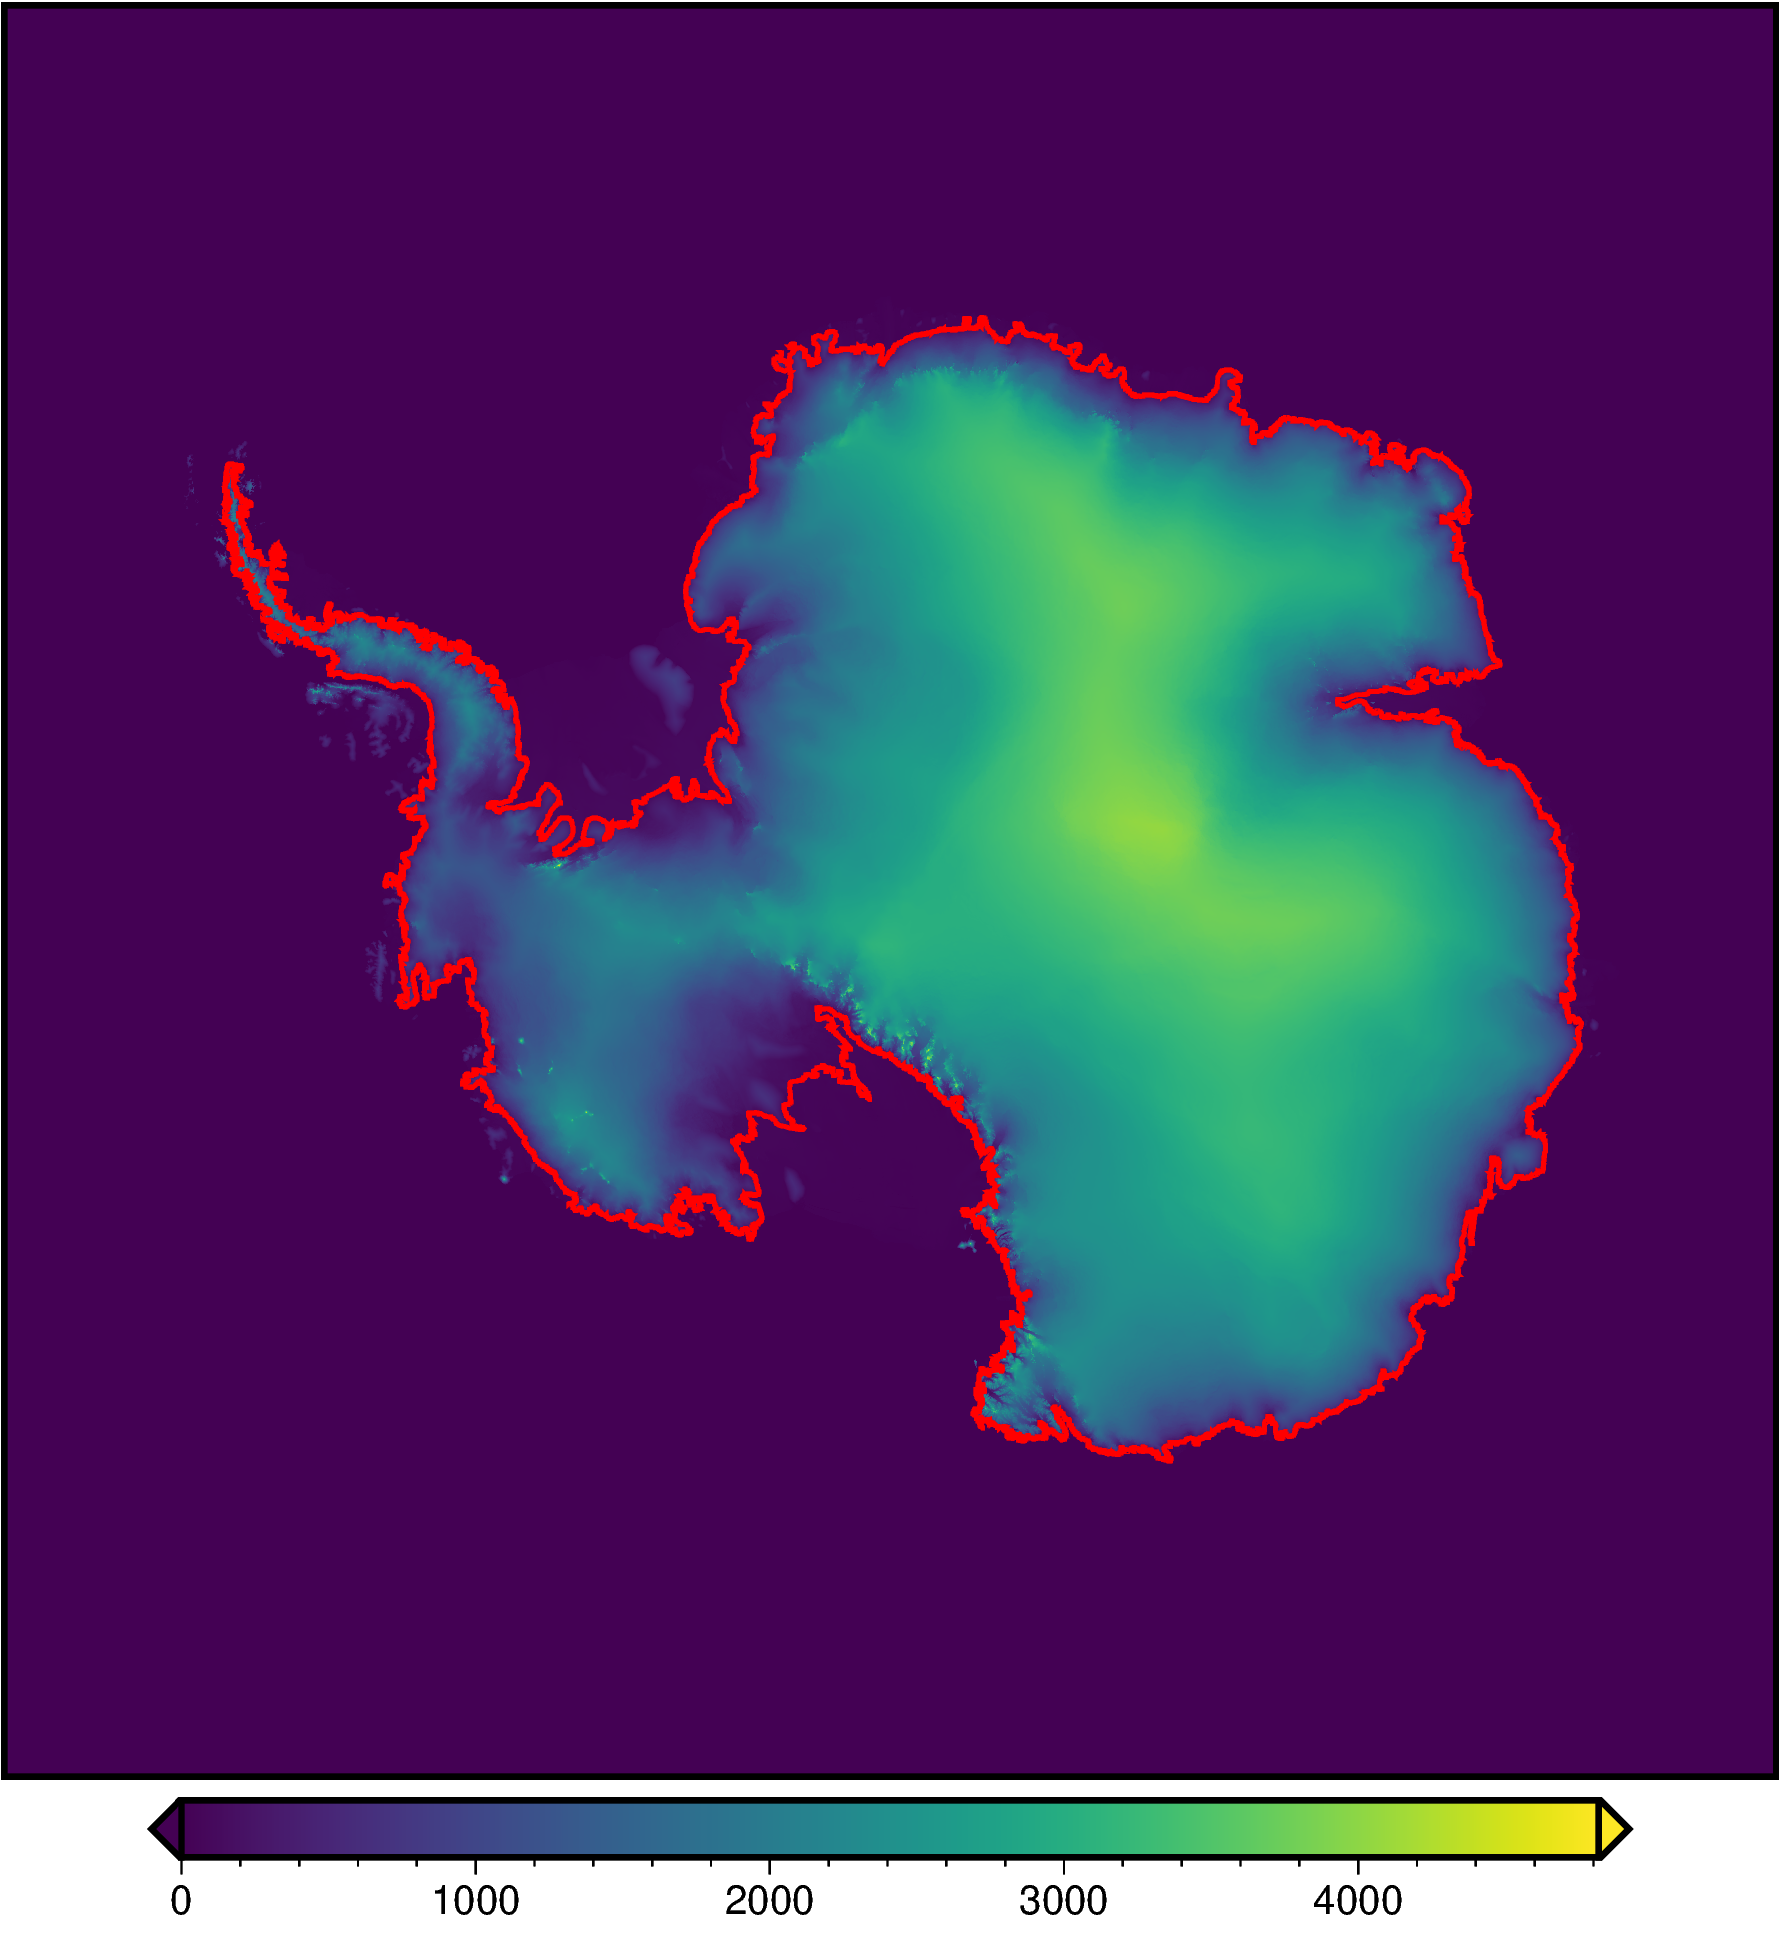

In [2]:
# fetch a grid
grid = fetch.bedmachine(layer="surface")

# utils.get_grid_info(grid)

# fetch a shapefile
shape = fetch.groundingline()

# get just the grounding line
gdf = pyogrio.read_dataframe(shape)
groundingline = gdf[gdf.Id_text == "Grounded ice or land"]

# plot the grid
fig = maps.plot_grd(grid)

# plot the shapefile
fig.plot(groundingline, pen="1p,red")

# show the plot
fig.show()

In [3]:
# mask the inside region
masked_inside = utils.mask_from_shp(shapefile=groundingline, xr_grid=grid, masked=True)

masked_inside.plot()

Error in callback <function _draw_all_if_interactive at 0x000002912299C700> (for post_execute):


MemoryError: Unable to allocate 5.30 GiB for an array with shape (177768889, 4) and data type float64

MemoryError: Unable to allocate 5.30 GiB for an array with shape (177768889, 4) and data type float64

<Figure size 640x480 with 2 Axes>

In [4]:
# mask the outside region
masked_outside = utils.mask_from_shp(
    shapefile=groundingline, xr_grid=grid, masked=True, invert=False
)

masked_outside.plot()

Error in callback <function _draw_all_if_interactive at 0x000002912299C700> (for post_execute):


MemoryError: Unable to allocate 5.30 GiB for an array with shape (177768889, 4) and data type float64

MemoryError: Unable to allocate 5.30 GiB for an array with shape (177768889, 4) and data type float64

<Figure size 640x480 with 2 Axes>